In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('C:/Users/PPP/PycharmProjects/StockPriceAPI/Investar')
from Analyzer import MarketDB

In [2]:
mk = MarketDB()
stocks = ['삼성전자', '현대자동차', 'NAVER', '미래에셋대우']
df = pd.DataFrame()
for s in stocks:
    df[s] = mk.get_daily_price(s, '2018-10-12')['close']

end_date is initialized to '2021-01-04'
end_date is initialized to '2021-01-04'
end_date is initialized to '2021-01-04'
end_date is initialized to '2021-01-04'


In [3]:
df

,삼성전자,현대자동차,NAVER,미래에셋대우
date,,,,
2018-10-12,44000,115500,142000,7160
2018-10-15,43800,113500,136000,7060
2018-10-16,43600,116500,133500,7000
2018-10-17,44150,118500,130000,7110
2018-10-18,44050,116000,125000,6990
...,...,...,...,...
2020-12-24,77800,187000,282000,9630
2020-12-28,78700,189500,281000,9490
2020-12-29,78300,190500,283000,9290


In [4]:
daily_ret = df.pct_change()
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252

port_ret = []
port_risk = []
port_weights = []

In [5]:
daily_ret

,삼성전자,현대자동차,NAVER,미래에셋대우
date,,,,
2018-10-12,NaN,NaN,NaN,NaN
2018-10-15,-0.004545,-0.017316,-0.042254,-0.013966
2018-10-16,-0.004566,0.026432,-0.018382,-0.008499
2018-10-17,0.012615,0.017167,-0.026217,0.015714
2018-10-18,-0.002265,-0.021097,-0.038462,-0.016878
...,...,...,...,...
2020-12-24,0.052774,0.010811,-0.007042,0.006270
2020-12-28,0.011568,0.013369,-0.003546,-0.014538
2020-12-29,-0.005083,0.005277,0.007117,-0.021075


In [6]:
annual_ret

삼성전자      0.331079
현대자동차     0.344872
NAVER     0.402361
미래에셋대우    0.217138
dtype: float64

In [7]:
daily_cov

,삼성전자,현대자동차,NAVER,미래에셋대우
삼성전자,0.000316,0.000194,0.000125,0.000275
현대자동차,0.000194,0.000611,0.000140,0.000371
NAVER,0.000125,0.000140,0.000560,0.000223
미래에셋대우,0.000275,0.000371,0.000223,0.000695


In [8]:
annual_cov

,삼성전자,현대자동차,NAVER,미래에셋대우
삼성전자,0.079750,0.048998,0.031493,0.069396
현대자동차,0.048998,0.154086,0.035236,0.093602
NAVER,0.031493,0.035236,0.141073,0.056113
미래에셋대우,0.069396,0.093602,0.056113,0.175196


In [9]:
for _ in range(20000):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))
    
    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    
portfolio = {'Returns': port_ret, 'Risk': port_risk}
for i, s in enumerate(stocks):
    portfolio[s] = [weight[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df = df[['Returns', 'Risk'] + [s for s in stocks]]

In [10]:
df

,Returns,Risk,삼성전자,현대자동차,NAVER,미래에셋대우
0,0.353476,0.266504,0.419291,0.017426,0.466126,0.097158
1,0.293318,0.322043,0.043835,0.079132,0.329749,0.547284
2,0.328742,0.287356,0.218433,0.434427,0.168578,0.178561
3,0.320792,0.286884,0.229335,0.372106,0.161927,0.236632
4,0.288746,0.301713,0.394177,0.186260,0.015670,0.403892
...,...,...,...,...,...,...
19995,0.336293,0.262679,0.352583,0.147415,0.324749,0.175254
19996,0.329644,0.263204,0.397046,0.224623,0.208258,0.170074
19997,0.312675,0.272510,0.520667,0.159031,0.085829,0.234472
19998,0.326517,0.278463,0.436134,0.384175,0.057299,0.122392


In [11]:
weights

array([0.19466595, 0.25996271, 0.03722039, 0.50815096])

In [12]:
portfolio

{'Returns': [0.35347551357869744,
  0.29331769314868134,
  0.3287423417458748,
  0.32079203950040724,
  0.2887455068376925,
  0.2846365976157239,
  0.3148421283674288,
  0.30544087552541577,
  0.33121554258254077,
  0.2883440573765341,
  0.3421755093258706,
  0.35856860764538434,
  0.29703755173872504,
  0.306821253671001,
  0.34815260869697595,
  0.3123063013185009,
  0.2831304082972862,
  0.34300680273927026,
  0.3574798094175254,
  0.31670407083039676,
  0.3228371027809026,
  0.34072852602958437,
  0.31262227438526596,
  0.352022775482143,
  0.3020824231452622,
  0.30205633145240895,
  0.3247836196613156,
  0.306099546269089,
  0.34070435397544657,
  0.2943460213886585,
  0.3066821668086795,
  0.3151719135609141,
  0.28821502414927824,
  0.3307537218860346,
  0.34680669136932424,
  0.3248117541529574,
  0.2754111736609126,
  0.3056814548367325,
  0.3500682022192028,
  0.2977402663742741,
  0.31011916042139426,
  0.33395962903408094,
  0.3237853336133529,
  0.32657186631054025,
  0.3

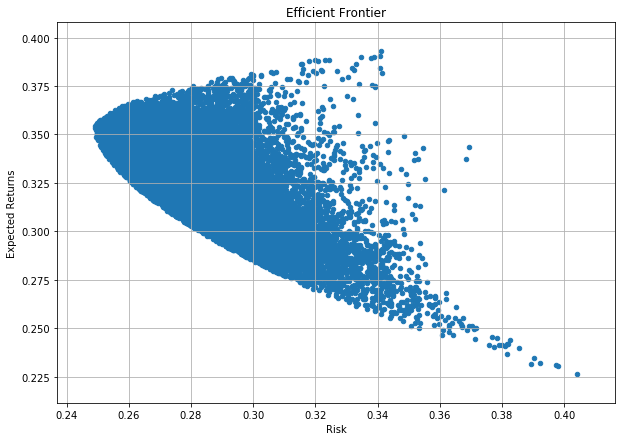

In [13]:
df.plot.scatter(x='Risk', y='Returns', figsize=(10,7), grid=True)
plt.title('Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()